In [1]:
!pip install Keras-Preprocessing

import os 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from tensorflow.keras.layers import Dense, Convolution2D, Dropout, Flatten, MaxPooling2D
import pandas as pd
import numpy as np
from keras_preprocessing.image import load_img
tf.config.run_functions_eagerly(True)

In [2]:
from tqdm.notebook import tqdm


In [3]:
'''train_dir = "Users/Bhinit Rout/OneDrive/Desktop/images/train"'''
test_dir = "images/test"
train_dir = "images/train"


    

In [4]:
def dataframe(dir):
    images_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            images_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)

    return images_paths,labels



        

In [5]:
dataframe(train_dir)
train = pd.DataFrame()
train["image_path"], train["label"] = dataframe(train_dir)
train.head(5)

,image_path,label
0,images/train\angry\0.jpg,angry
1,images/train\angry\1.jpg,angry
2,images/train\angry\10.jpg,angry
3,images/train\angry\10002.jpg,angry
4,images/train\angry\10016.jpg,angry


In [6]:
dataframe(test_dir)
test = pd.DataFrame()
test["image_path"],test["label"] = dataframe(test_dir)
test.head(5)

,image_path,label
0,images/test\angry\10052.jpg,angry
1,images/test\angry\10065.jpg,angry
2,images/test\angry\10079.jpg,angry
3,images/test\angry\10095.jpg,angry
4,images/test\angry\10121.jpg,angry


In [7]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [8]:
train_features = extract_features(train["image_path"])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\Bhinit Rout\miniconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [9]:
test_features = extract_features(test["image_path"])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [10]:
x_train = train_features/255.0
x_test = test_features/255.0

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
le.fit(train['label'])
le.fit(test["label"])



LabelEncoder()

In [13]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [15]:
train['label']

0           angry
1           angry
2           angry
3           angry
4           angry
           ...   
28816    surprise
28817    surprise
28818    surprise
28819    surprise
28820    surprise
Name: label, Length: 28821, dtype: object

In [16]:
x_train 

array([[[[0.28235294],
         [0.30588235],
         [0.31764706],
         ...,
         [0.20392157],
         [0.16862745],
         [0.15686275]],

        [[0.25490196],
         [0.24313725],
         [0.23137255],
         ...,
         [0.21568627],
         [0.20392157],
         [0.17647059]],

        [[0.18431373],
         [0.16470588],
         [0.23529412],
         ...,
         [0.18431373],
         [0.21176471],
         [0.19215686]],

        ...,

        [[0.35686275],
         [0.25490196],
         [0.18039216],
         ...,
         [0.29019608],
         [0.21176471],
         [0.16862745]],

        [[0.29803922],
         [0.31372549],
         [0.29803922],
         ...,
         [0.42352941],
         [0.27058824],
         [0.18039216]],

        [[0.30196078],
         [0.29019608],
         [0.31764706],
         ...,
         [0.41176471],
         [0.42352941],
         [0.32156863]]],


       [[[0.59607843],
         [0.58431373],
         [0.57

In [17]:
y_train2 = to_categorical(y_train,num_classes = 7)
y_test2 = to_categorical(y_test,num_classes =7)

In [18]:
x_train

array([[[[0.28235294],
         [0.30588235],
         [0.31764706],
         ...,
         [0.20392157],
         [0.16862745],
         [0.15686275]],

        [[0.25490196],
         [0.24313725],
         [0.23137255],
         ...,
         [0.21568627],
         [0.20392157],
         [0.17647059]],

        [[0.18431373],
         [0.16470588],
         [0.23529412],
         ...,
         [0.18431373],
         [0.21176471],
         [0.19215686]],

        ...,

        [[0.35686275],
         [0.25490196],
         [0.18039216],
         ...,
         [0.29019608],
         [0.21176471],
         [0.16862745]],

        [[0.29803922],
         [0.31372549],
         [0.29803922],
         ...,
         [0.42352941],
         [0.27058824],
         [0.18039216]],

        [[0.30196078],
         [0.29019608],
         [0.31764706],
         ...,
         [0.41176471],
         [0.42352941],
         [0.32156863]]],


       [[[0.59607843],
         [0.58431373],
         [0.57

In [19]:
model = Sequential()
# convolutional layers
model.add(Convolution2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Convolution2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Convolution2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Convolution2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy'  )



C:\Users\Bhinit Rout\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
x_train.shape


(28821, 48, 48, 1)

In [27]:
print("Bhinit")

Bhinit


In [20]:
model.fit(x= x_train,y = y_train2, batch_size = 128, epochs = 5, validation_data = (x_test,y_test2)) 

C:\Users\Bhinit Rout\miniconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - loss: 1.8336 - val_loss: 1.8026
Epoch 2/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - loss: 1.7973 - val_loss: 1.7298
Epoch 3/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - loss: 1.7305 - val_loss: 1.6130
Epoch 4/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - loss: 1.6103 - val_loss: 1.4651
Epoch 5/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - loss: 1.5119 - val_loss: 1.3937


In [23]:

def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [24]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
model prediction is  happy


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
model prediction is  fear


C:\Users\Bhinit Rout\miniconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\Bhinit Rout\miniconda3\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


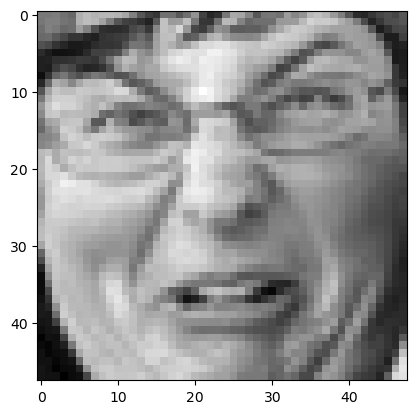

In [26]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
model prediction is  happy


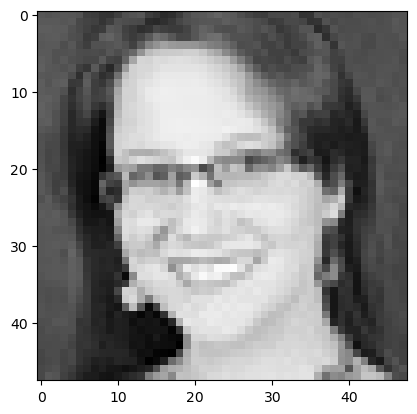

In [27]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
model prediction is  happy


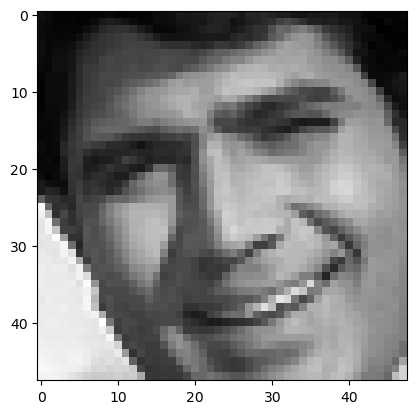

In [43]:
image = 'images/test/happy/14965.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [36]:
from keras.models import model_from_json
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [38]:
import pickle 

In [39]:
saved_model = pickle.dumps(model) 

In [41]:
my_model = pickle.loads(saved_model)

C:\Users\Bhinit Rout\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
model prediction is  happy


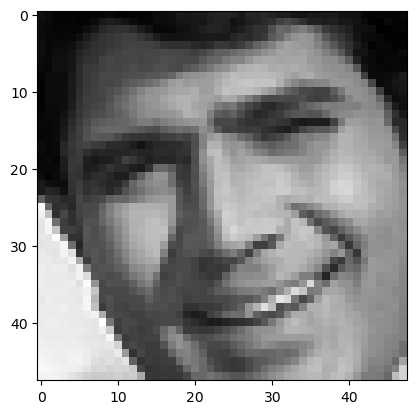

In [42]:
image = 'images/test/happy/14965.jpg'
print("original image is of happy")
img = ef(image)
pred = my_model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [1]:
import cv2
from keras.models import model_from_json
import numpy as np
# from keras_preprocessing.image import load_img
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

model.load_weights("emotiondetector.h5")
haar_file=cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade=cv2.CascadeClassifier(haar_file)

def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

webcam=cv2.VideoCapture(0)
labels = {0 : 'angry', 1 : 'disgust', 2 : 'fear', 3 : 'happy', 4 : 'neutral', 5 : 'sad', 6 : 'surprise'}
while True:
    i,im=webcam.read()
    gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(im,1.3,5)
    try: 
        for (p,q,r,s) in faces:
            image = gray[q:q+s,p:p+r]
            cv2.rectangle(im,(p,q),(p+r,q+s),(255,0,0),2)
            image = cv2.resize(image,(48,48))
            img = extract_features(image)
            pred = model.predict(img)
            prediction_label = labels[pred.argmax()]
            # print("Predicted Output:", prediction_label)
            # cv2.putText(im,prediction_label)
            cv2.putText(im, '% s' %(prediction_label), (p-10, q-10),cv2.FONT_HERSHEY_COMPLEX_SMALL,2, (0,0,255))
        cv2.imshow("Output",im)
        cv2.waitKey(27)
    except cv2.error:
        pass

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 

KeyboardInterrupt: 